# Clustering Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

In [2]:
orginal_data = pd.read_csv('Dataset/accident_dataset.csv')
orginal_data.head(5)

Country           State                              Year       City name  \
0   India       Jharkhand  Financial Year (Apr - Mar), 2021         Dhanbad   
1   India  Andhra Pradesh  Financial Year (Apr - Mar), 2020  Vijaywada city   
2   India         Gujarat  Financial Year (Apr - Mar), 2020         Vadodra   
3   India  Andhra Pradesh  Financial Year (Apr - Mar), 2021           Vizag   
4   India           Bihar  Financial Year (Apr - Mar), 2020           Patna   

  Type of impacting vehicles or objects  Number of road accidents  \
0                                Others                         0   
1                              Bicycles                        38   
2                              Bicycles                        19   
3                        Auto Rickshaws                        74   
4                            Pedestrian                        80   

   Number of persons killed in road accidents   \
0                                          0.0   
1                                         16.0   
2                                          5.0   
3                                         10.0   
4                                         52.0   

   Number of grievously injured persons  Number of minor injured persons  
0                                   0.0                              0.0  
1                                   8.0                             19.0  
2                                  10.0                              5.0  
3                                  46.0                             46.0  
4                                  68.0                              3.0

In [3]:
state_accident_sum = orginal_data.groupby('State')['Number of road accidents'].sum()
orginal_data['Total Accidents'] = orginal_data['State'].map(state_accident_sum)
orginal_data.head(5)

Country           State                              Year       City name  \
0   India       Jharkhand  Financial Year (Apr - Mar), 2021         Dhanbad   
1   India  Andhra Pradesh  Financial Year (Apr - Mar), 2020  Vijaywada city   
2   India         Gujarat  Financial Year (Apr - Mar), 2020         Vadodra   
3   India  Andhra Pradesh  Financial Year (Apr - Mar), 2021           Vizag   
4   India           Bihar  Financial Year (Apr - Mar), 2020           Patna   

  Type of impacting vehicles or objects  Number of road accidents  \
0                                Others                         0   
1                              Bicycles                        38   
2                              Bicycles                        19   
3                        Auto Rickshaws                        74   
4                            Pedestrian                        80   

   Number of persons killed in road accidents   \
0                                          0.0   
1                                         16.0   
2                                          5.0   
3                                         10.0   
4                                         52.0   

   Number of grievously injured persons  Number of minor injured persons  \
0                                   0.0                              0.0   
1                                   8.0                             19.0   
2                                  10.0                              5.0   
3                                  46.0                             46.0   
4                                  68.0                              3.0   

   Total Accidents  
0              984  
1             9605  
2             9194  
3             9605  
4             1281

In [4]:
import warnings
warnings.filterwarnings("ignore")
orginal_data['Year_int'] = orginal_data['Year'].str.extract(r'(\d{4})').astype(int)
orginal_data = orginal_data.drop(columns=['Year'])
orginal_data.head(5)

Country           State       City name  \
0   India       Jharkhand         Dhanbad   
1   India  Andhra Pradesh  Vijaywada city   
2   India         Gujarat         Vadodra   
3   India  Andhra Pradesh           Vizag   
4   India           Bihar           Patna   

  Type of impacting vehicles or objects  Number of road accidents  \
0                                Others                         0   
1                              Bicycles                        38   
2                              Bicycles                        19   
3                        Auto Rickshaws                        74   
4                            Pedestrian                        80   

   Number of persons killed in road accidents   \
0                                          0.0   
1                                         16.0   
2                                          5.0   
3                                         10.0   
4                                         52.0   

   Number of grievously injured persons  Number of minor injured persons  \
0                                   0.0                              0.0   
1                                   8.0                             19.0   
2                                  10.0                              5.0   
3                                  46.0                             46.0   
4                                  68.0                              3.0   

   Total Accidents  Year_int  
0              984      2021  
1             9605      2020  
2             9194      2020  
3             9605      2021  
4             1281      2020

In [5]:
clean_data = pd.read_csv('Dataset/pre_processed_data.csv')
clean_data.head(5)

Number of road accidents  Number of persons killed in road accidents   \
0                 -0.519831                                    -0.553056   
1                 -0.392220                                    -0.297388   
2                 -0.456026                                    -0.473160   
3                 -0.271325                                    -0.393263   
4                 -0.251175                                     0.277867   

   Number of grievously injured persons  Number of minor injured persons  \
0                             -0.399422                        -0.389094   
1                             -0.344933                        -0.293462   
2                             -0.331311                        -0.363928   
3                             -0.086111                        -0.157564   
4                              0.063734                        -0.373994   

   Year_int  State_encoded  City_encoded  Vechile_impacted_encoded  
0  1.224291      -0.568936     -0.866505                  0.387155  
1  0.000000      -2.183015      1.627624                 -1.161465  
2  0.000000      -1.174216      1.489061                 -1.161465  
3  1.224291      -2.183015      1.696905                 -1.548619  
4  0.000000      -1.981255      0.865529                  0.774310

In [6]:
from sklearn.preprocessing import LabelEncoder
# Load the dataset into a pandas DataFrame
# Assuming 'city' is the name of the column you want to encode
# Replace it with the actual name of your city column
city_column = 'City name'

# Initialize a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'city' column
orginal_data[city_column + '_encoded'] = label_encoder.fit_transform(orginal_data[city_column])
orginal_data.head(2)

Country           State       City name  \
0   India       Jharkhand         Dhanbad   
1   India  Andhra Pradesh  Vijaywada city   

  Type of impacting vehicles or objects  Number of road accidents  \
0                                Others                         0   
1                              Bicycles                        38   

   Number of persons killed in road accidents   \
0                                          0.0   
1                                         16.0   

   Number of grievously injured persons  Number of minor injured persons  \
0                                   0.0                              0.0   
1                                   8.0                             19.0   

   Total Accidents  Year_int  City name_encoded  
0              984      2021                 12  
1             9605      2020                 48

In [7]:
city_column = 'State'

# Initialize a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'city' column
orginal_data[city_column + '_encoded'] = label_encoder.fit_transform(orginal_data[city_column])
orginal_data.head(2)

Country           State       City name  \
0   India       Jharkhand         Dhanbad   
1   India  Andhra Pradesh  Vijaywada city   

  Type of impacting vehicles or objects  Number of road accidents  \
0                                Others                         0   
1                              Bicycles                        38   

   Number of persons killed in road accidents   \
0                                          0.0   
1                                         16.0   

   Number of grievously injured persons  Number of minor injured persons  \
0                                   0.0                              0.0   
1                                   8.0                             19.0   

   Total Accidents  Year_int  City name_encoded  State_encoded  
0              984      2021                 12              8  
1             9605      2020                 48              0

### Applyling k-means++ on number of road accident and city encoded

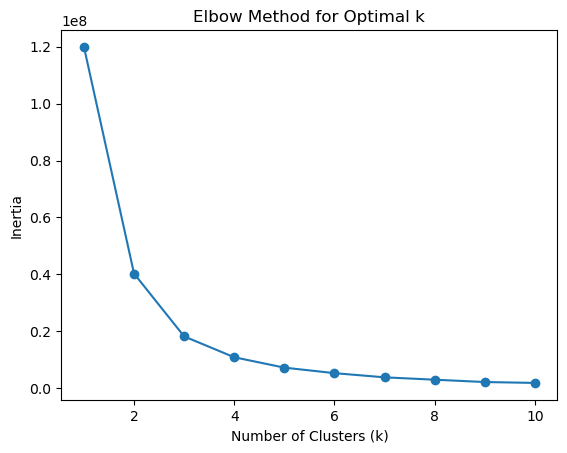

In [8]:
features = orginal_data[['Number of road accidents', 'City name_encoded']]

# Specify a range of values for k
k_values = range(1, 11)  # Adjust the upper limit as needed

# Initialize an empty list to store the inertia values
inertia_values = []

# Perform k-means clustering for each value of k and store the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

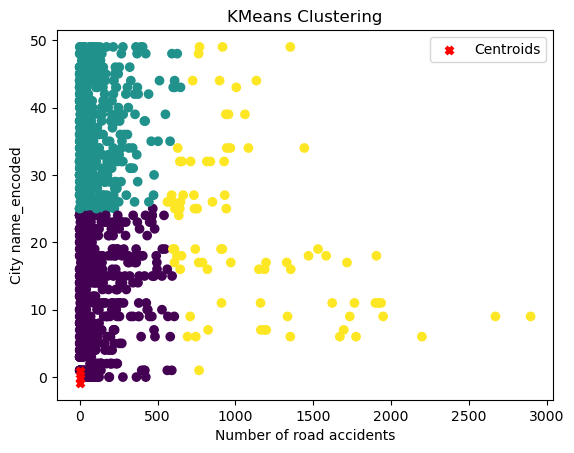

In [9]:
# Select the features for clustering
features_for_clustering = ['Number of road accidents', 'City name_encoded']

# Standardize the data (important for KMeans)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(orginal_data[features_for_clustering])

# Apply KMeans clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
orginal_data['cluster'] = kmeans.fit_predict(scaled_data)

# Plotting the clusters
plt.scatter(orginal_data['Number of road accidents'], orginal_data['City name_encoded'], c=orginal_data['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=25, linewidths=3, color='red', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Number of road accidents')
plt.ylabel('City name_encoded')
plt.legend()
plt.show()

Silhouette Score: 0.5217447567280594


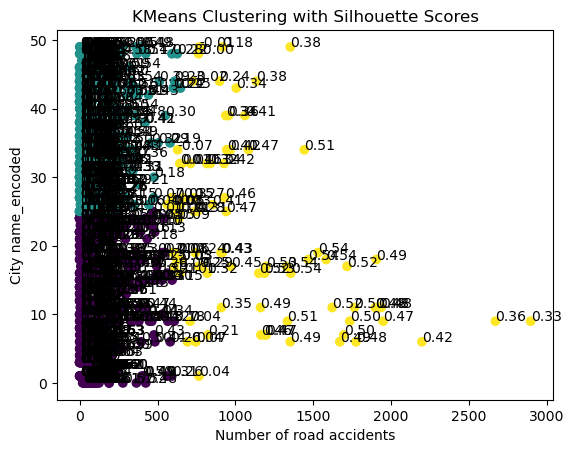

In [10]:
# Apply KMeans clustering as an example
#n_clusters = 3
#kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#original_data['cluster'] = kmeans.fit_predict(scaled_data)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_data, orginal_data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Optionally, you can print the Silhouette Score for each data point
silhouette_values = silhouette_samples(scaled_data, orginal_data['cluster'])
orginal_data['silhouette'] = silhouette_values

# Plotting the clusters with Silhouette Scores
plt.scatter(orginal_data['Number of road accidents'], orginal_data['City name_encoded'], c=orginal_data['cluster'], cmap='viridis')
plt.title('KMeans Clustering with Silhouette Scores')
plt.xlabel('Number of road accidents')
plt.ylabel('City name_encoded')

# Draw vertical lines for silhouette scores
for i, silhouette in enumerate(silhouette_values):
    plt.text(orginal_data['Number of road accidents'][i] + 0.1, orginal_data['City name_encoded'][i], f'{silhouette:.2f}')

plt.show()

In [11]:
# Calculate Dunn Index
from sklearn.metrics import pairwise_distances
def dunn_index(data, labels):
    # Calculate pairwise distances within clusters
    intra_cluster_distances = []
    for label in np.unique(labels):
        cluster_points = data[labels == label]
        pairwise_distances_intra = pairwise_distances(cluster_points, metric='euclidean')
        np.fill_diagonal(pairwise_distances_intra, np.inf)  # Set diagonal elements to infinity
        intra_cluster_distances.append(np.min(pairwise_distances_intra))

    # Calculate pairwise distances between clusters
    pairwise_distances_inter = pairwise_distances(data, metric='euclidean')
    inter_cluster_distances = np.min(pairwise_distances_inter)

    # Calculate Dunn Index
    dunn_index_value = inter_cluster_distances / np.max(intra_cluster_distances)
    return dunn_index_value

In [12]:
dunn_index_value = dunn_index(scaled_data, orginal_data['cluster'])
print(f"Dunn Index: {dunn_index_value}")

Dunn Index: 0.0


The yellow points are the cities which are red zone area, this is not exactly the cluster but it gives some info about redzone area

### Applyling k-means++ on total_accidents and state_encoded

In [13]:
from sklearn.preprocessing import MinMaxScaler
# Select the features you want to normalize
features_to_normalize = ['State_encoded', 'Total Accidents']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected features
orginal_data[features_to_normalize] = scaler.fit_transform(orginal_data[features_to_normalize])

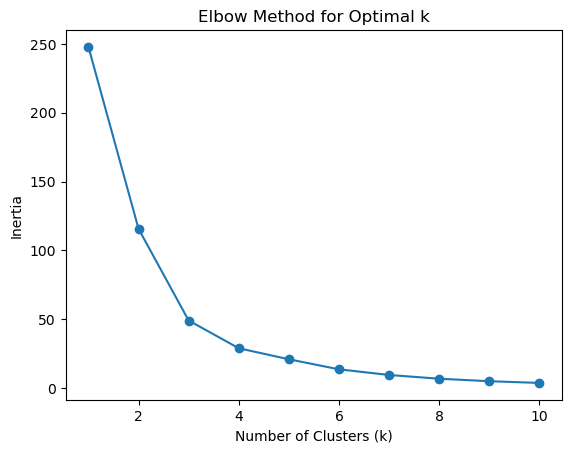

In [14]:
features = orginal_data[['State_encoded', 'Total Accidents']]

# Specify a range of values for k
k_values = range(1, 11)  # Adjust the upper limit as needed

# Initialize an empty list to store the inertia values
inertia_values = []

# Perform k-means clustering for each value of k and store the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

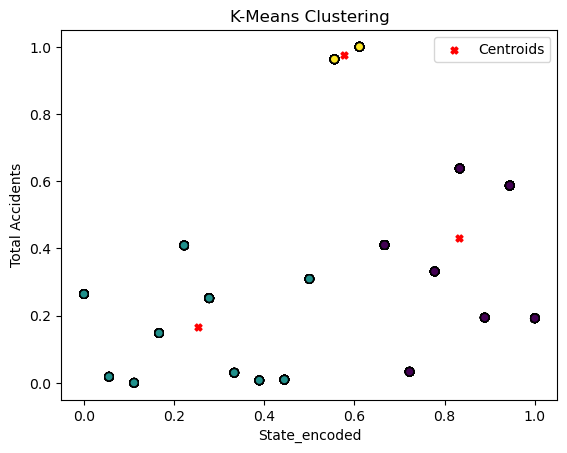

In [15]:
# Specify the number of clusters (you can change this as needed)
n_clusters = 3

features = orginal_data[['State_encoded', 'Total Accidents']]
# Perform k-means clustering with KMeans++ initialization
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
orginal_data['cluster'] = kmeans.fit_predict(features)

# Visualize the clusters
plt.scatter(orginal_data['State_encoded'], orginal_data['Total Accidents'], c=orginal_data['cluster'], cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=25, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('State_encoded')
plt.ylabel('Total Accidents')
plt.legend()
plt.show()

### DB Scan on city encoded vs number of road accident 

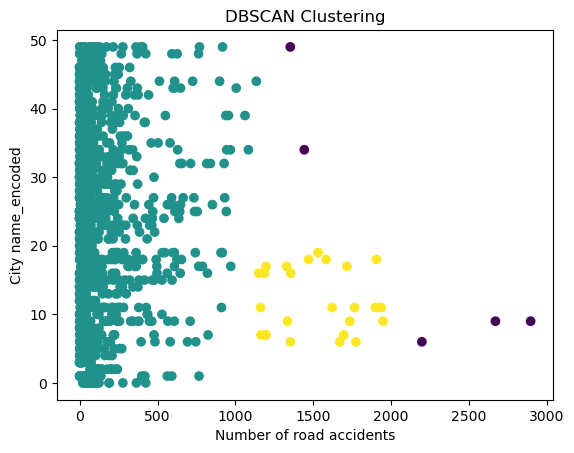

In [16]:
from sklearn.cluster import DBSCAN
# Select the features for clustering
features_for_clustering = ['Number of road accidents', 'City name_encoded']

# Standardize the data (important for DBSCAN)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(orginal_data[features_for_clustering])

# Apply DBSCAN
eps = 0.5  # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 3  # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
orginal_data['cluster'] = dbscan.fit_predict(scaled_data)

# Plotting the clusters
plt.scatter(orginal_data['Number of road accidents'], orginal_data['City name_encoded'], c=orginal_data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Number of road accidents')
plt.ylabel('City name_encoded')
plt.show()

Silhouette Score: 0.6899735517964395


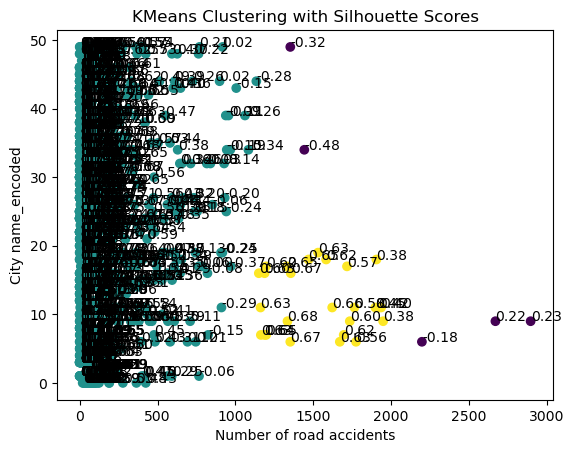

In [17]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_data, orginal_data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Optionally, you can print the Silhouette Score for each data point
silhouette_values = silhouette_samples(scaled_data, orginal_data['cluster'])
orginal_data['silhouette'] = silhouette_values

# Plotting the clusters with Silhouette Scores
plt.scatter(orginal_data['Number of road accidents'], orginal_data['City name_encoded'], c=orginal_data['cluster'], cmap='viridis')
plt.title('KMeans Clustering with Silhouette Scores')
plt.xlabel('Number of road accidents')
plt.ylabel('City name_encoded')

# Draw vertical lines for silhouette scores
for i, silhouette in enumerate(silhouette_values):
    plt.text(orginal_data['Number of road accidents'][i] + 0.1, orginal_data['City name_encoded'][i], f'{silhouette:.2f}')

plt.show()

In [18]:
dunn_index_value = dunn_index(scaled_data, orginal_data['cluster'])
print(f"Dunn Index: {dunn_index_value}")

Dunn Index: 0.0


### Agglomertaive clustering ( hierarchy of clusters) 

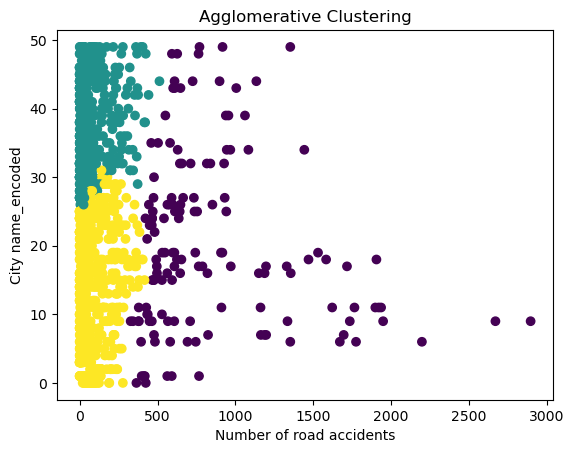

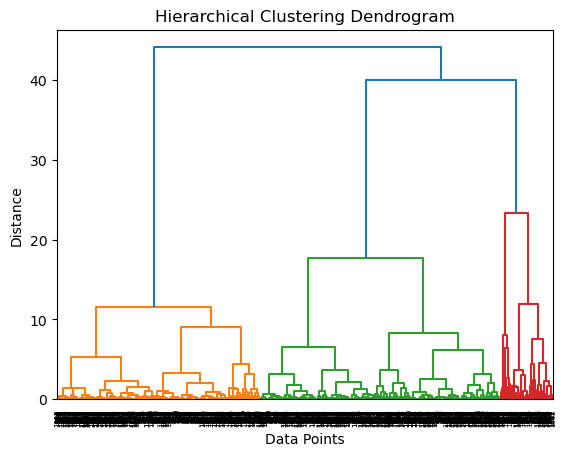

In [19]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Select the features for clustering
features_for_clustering = ['Number of road accidents', 'City name_encoded']

# Standardize the data (important for agglomerative clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(orginal_data[features_for_clustering])

# Apply Agglomerative Clustering
n_clusters = 3  # Number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
orginal_data['cluster'] = agg_clustering.fit_predict(scaled_data)

# Plotting the clusters
plt.scatter(orginal_data['Number of road accidents'], orginal_data['City name_encoded'], c=orginal_data['cluster'], cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Number of road accidents')
plt.ylabel('City name_encoded')
plt.show()

# Visualize the dendrogram
linkage_matrix = linkage(scaled_data, method='ward')  # You can choose other linkage methods
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

Silhouette Score: 0.5008500242638032


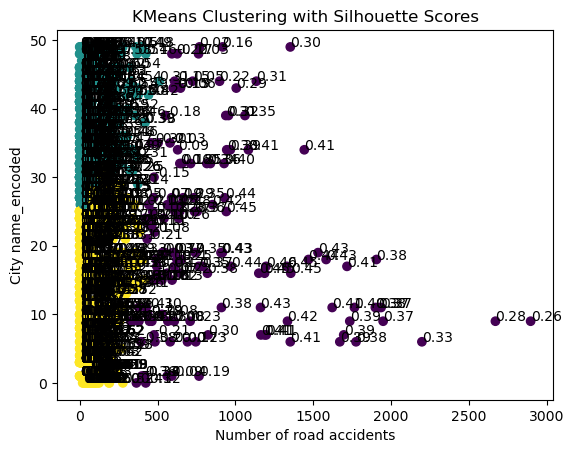

In [20]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_data, orginal_data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Optionally, you can print the Silhouette Score for each data point
silhouette_values = silhouette_samples(scaled_data, orginal_data['cluster'])
orginal_data['silhouette'] = silhouette_values

# Plotting the clusters with Silhouette Scores
plt.scatter(orginal_data['Number of road accidents'], orginal_data['City name_encoded'], c=orginal_data['cluster'], cmap='viridis')
plt.title('KMeans Clustering with Silhouette Scores')
plt.xlabel('Number of road accidents')
plt.ylabel('City name_encoded')

# Draw vertical lines for silhouette scores
for i, silhouette in enumerate(silhouette_values):
    plt.text(orginal_data['Number of road accidents'][i] + 0.1, orginal_data['City name_encoded'][i], f'{silhouette:.2f}')

plt.show()

### Applying GMM

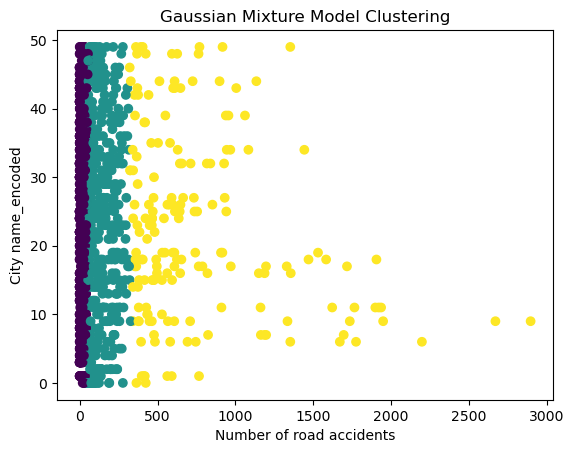

In [21]:
from sklearn.mixture import GaussianMixture
features_for_clustering = ['Number of road accidents', 'City name_encoded']
# Standardize the data (important for GMM)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(orginal_data[features_for_clustering])

# Apply Gaussian Mixture Model (GMM)
n_components = 3  # Number of components (clusters)
gmm = GaussianMixture(n_components=n_components)
orginal_data['cluster'] = gmm.fit_predict(scaled_data)

# Plotting the clusters
plt.scatter(orginal_data['Number of road accidents'], orginal_data['City name_encoded'], c=orginal_data['cluster'], cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Number of road accidents')
plt.ylabel('City name_encoded')
plt.show()

Silhouette Score: 0.08786853544187101


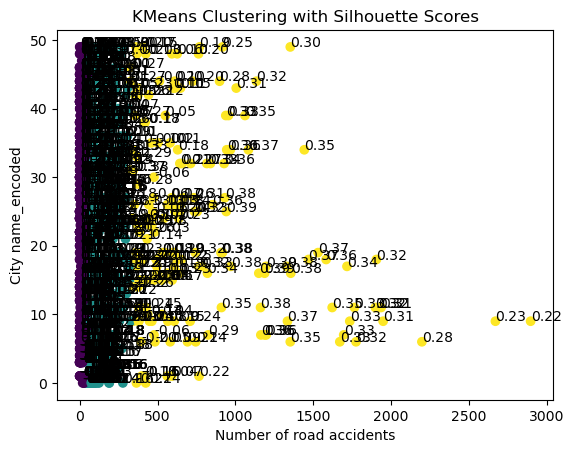

In [22]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_data, orginal_data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Optionally, you can print the Silhouette Score for each data point
silhouette_values = silhouette_samples(scaled_data, orginal_data['cluster'])
orginal_data['silhouette'] = silhouette_values

# Plotting the clusters with Silhouette Scores
plt.scatter(orginal_data['Number of road accidents'], orginal_data['City name_encoded'], c=orginal_data['cluster'], cmap='viridis')
plt.title('KMeans Clustering with Silhouette Scores')
plt.xlabel('Number of road accidents')
plt.ylabel('City name_encoded')

# Draw vertical lines for silhouette scores
for i, silhouette in enumerate(silhouette_values):
    plt.text(orginal_data['Number of road accidents'][i] + 0.1, orginal_data['City name_encoded'][i], f'{silhouette:.2f}')

plt.show()

Why GMM failed here "GMM assumes that the underlying data distribution is a mixture of Gaussian distributions. If the data has a complex or non-Gaussian distribution, GMM may not accurately capture the underlying patterns."
"GMM is sensitive to outliers, as outliers can disproportionately influence the estimation of parameters. If there are outliers in the data, GMM may assign them to their own clusters, affecting the overall clustering quality."

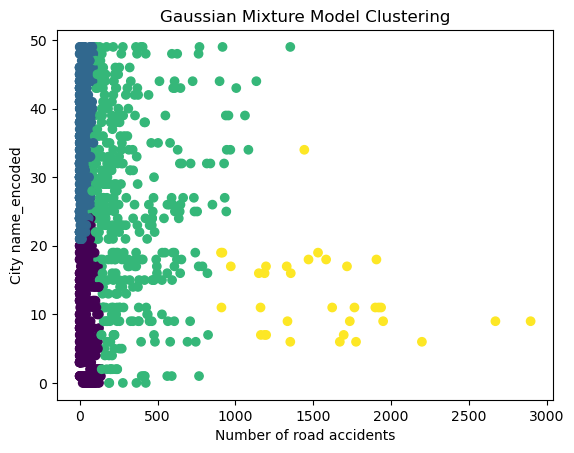

In [23]:
from sklearn.mixture import GaussianMixture
features_for_clustering = ['Number of road accidents', 'City name_encoded']
# Standardize the data (important for GMM)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(orginal_data[features_for_clustering])

# Apply Gaussian Mixture Model (GMM)
n_components = 4  # Number of components (clusters)
gmm = GaussianMixture(n_components=n_components)
orginal_data['cluster'] = gmm.fit_predict(scaled_data)

# Plotting the clusters
plt.scatter(orginal_data['Number of road accidents'], orginal_data['City name_encoded'], c=orginal_data['cluster'], cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Number of road accidents')
plt.ylabel('City name_encoded')
plt.show()

Silhouette Score: 0.35239262030139706


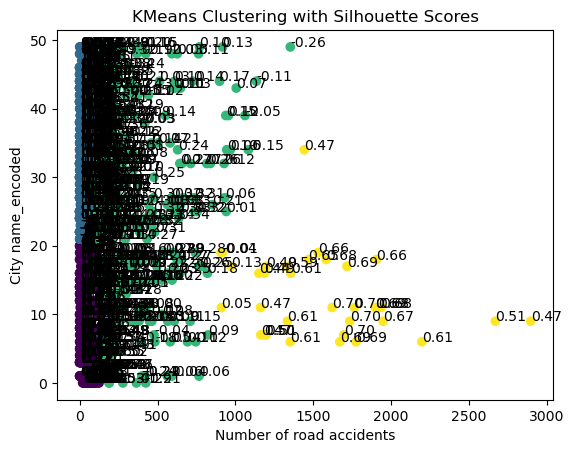

In [24]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_data, orginal_data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Optionally, you can print the Silhouette Score for each data point
silhouette_values = silhouette_samples(scaled_data, orginal_data['cluster'])
orginal_data['silhouette'] = silhouette_values

# Plotting the clusters with Silhouette Scores
plt.scatter(orginal_data['Number of road accidents'], orginal_data['City name_encoded'], c=orginal_data['cluster'], cmap='viridis')
plt.title('KMeans Clustering with Silhouette Scores')
plt.xlabel('Number of road accidents')
plt.ylabel('City name_encoded')

# Draw vertical lines for silhouette scores
for i, silhouette in enumerate(silhouette_values):
    plt.text(orginal_data['Number of road accidents'][i] + 0.1, orginal_data['City name_encoded'][i], f'{silhouette:.2f}')

plt.show()

### Some feature transformation to apply GMM 

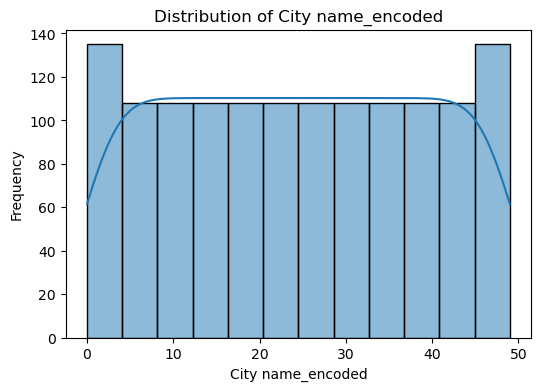

In [25]:
feature_to_check = 'City name_encoded'

# Load the dataset into a pandas DataFrame
#df = pd.read_csv(file_path)

# Visualize the distribution using a histogram
plt.figure(figsize=(6, 4))
sns.histplot(orginal_data[feature_to_check], kde=True)
plt.title(f'Distribution of {feature_to_check}')
plt.xlabel(feature_to_check)
plt.ylabel('Frequency')
plt.show()

In [26]:
# Assuming 'feature1' is the name of your numerical feature
orginal_data['Number_of_road_accidents_log'] = np.log1p(orginal_data['Number of road accidents'])
orginal_data.head(2)

Country           State       City name  \
0   India       Jharkhand         Dhanbad   
1   India  Andhra Pradesh  Vijaywada city   

  Type of impacting vehicles or objects  Number of road accidents  \
0                                Others                         0   
1                              Bicycles                        38   

   Number of persons killed in road accidents   \
0                                          0.0   
1                                         16.0   

   Number of grievously injured persons  Number of minor injured persons  \
0                                   0.0                              0.0   
1                                   8.0                             19.0   

   Total Accidents  Year_int  City name_encoded  State_encoded  cluster  \
0         0.009221      2021                 12       0.444444        0   
1         0.264001      2020                 48       0.000000        1   

   silhouette  Number_of_road_accidents_log  
0    0.730123                      0.000000  
1    0.585968                      3.663562

In [27]:
orginal_data['city_encoded_log'] = np.log1p(orginal_data['City name_encoded'])
orginal_data.head(2)

Country           State       City name  \
0   India       Jharkhand         Dhanbad   
1   India  Andhra Pradesh  Vijaywada city   

  Type of impacting vehicles or objects  Number of road accidents  \
0                                Others                         0   
1                              Bicycles                        38   

   Number of persons killed in road accidents   \
0                                          0.0   
1                                         16.0   

   Number of grievously injured persons  Number of minor injured persons  \
0                                   0.0                              0.0   
1                                   8.0                             19.0   

   Total Accidents  Year_int  City name_encoded  State_encoded  cluster  \
0         0.009221      2021                 12       0.444444        0   
1         0.264001      2020                 48       0.000000        1   

   silhouette  Number_of_road_accidents_log  city_encoded_log  
0    0.730123                      0.000000          2.564949  
1    0.585968                      3.663562          3.891820

In [28]:
nan_count = orginal_data['city_encoded_log'].isna().sum()
print(nan_count)

0


In [29]:
orginal_data['killed_log'] = np.log1p(orginal_data['Number of persons killed in road accidents '])
orginal_data.head(2)

Country           State       City name  \
0   India       Jharkhand         Dhanbad   
1   India  Andhra Pradesh  Vijaywada city   

  Type of impacting vehicles or objects  Number of road accidents  \
0                                Others                         0   
1                              Bicycles                        38   

   Number of persons killed in road accidents   \
0                                          0.0   
1                                         16.0   

   Number of grievously injured persons  Number of minor injured persons  \
0                                   0.0                              0.0   
1                                   8.0                             19.0   

   Total Accidents  Year_int  City name_encoded  State_encoded  cluster  \
0         0.009221      2021                 12       0.444444        0   
1         0.264001      2020                 48       0.000000        1   

   silhouette  Number_of_road_accidents_log  city_encoded_log  killed_log  
0    0.730123                      0.000000          2.564949    0.000000  
1    0.585968                      3.663562          3.891820    2.833213

In [30]:
nan_count = orginal_data['killed_log'].isna().sum()
print(nan_count)

1


In [31]:
data_cl = orginal_data.dropna(subset=['killed_log'])
nan_count = data_cl['killed_log'].isna().sum()
print(nan_count)

0


converting feature "number of raos accidents" into normal distribution using log of that feature as faeture intiall yfollowd negative exponential distribution it's log normal distribution

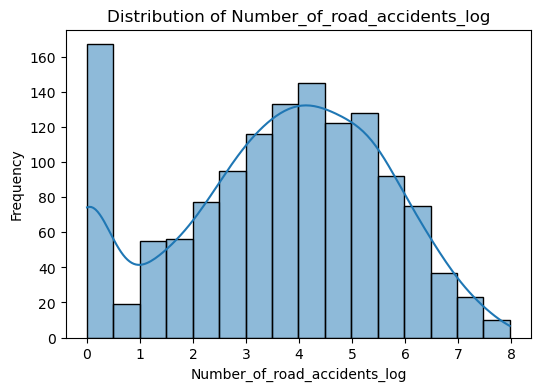

In [32]:
feature_to_check = 'Number_of_road_accidents_log'

# Load the dataset into a pandas DataFrame
#df = pd.read_csv(file_path)

# Visualize the distribution using a histogram
plt.figure(figsize=(6, 4))
sns.histplot(orginal_data[feature_to_check], kde=True)
plt.title(f'Distribution of {feature_to_check}')
plt.xlabel(feature_to_check)
plt.ylabel('Frequency')
plt.show()

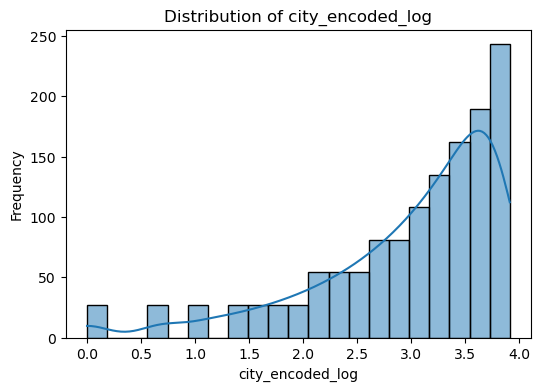

In [33]:
feature_to_check = 'city_encoded_log'
# Visualize the distribution using a histogram
plt.figure(figsize=(6, 4))
sns.histplot(orginal_data[feature_to_check], kde=True)
plt.title(f'Distribution of {feature_to_check}')
plt.xlabel(feature_to_check)
plt.ylabel('Frequency')
plt.show()

### Now applying GMM after converting feture into normal ditribution  

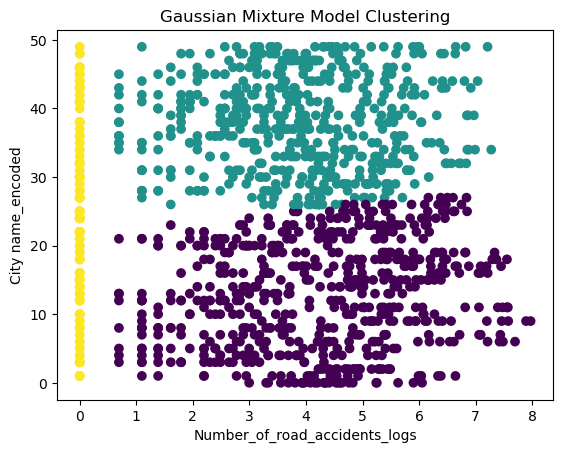

In [34]:
features_for_clustering = ['Number_of_road_accidents_log', 'City name_encoded']
# Standardize the data (important for GMM)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(orginal_data[features_for_clustering])

# Apply Gaussian Mixture Model (GMM)
n_components = 3  # Number of components (clusters)
gmm = GaussianMixture(n_components=n_components)
orginal_data['cluster'] = gmm.fit_predict(scaled_data)

# Plotting the clusters
plt.scatter(orginal_data['Number_of_road_accidents_log'], orginal_data['City name_encoded'], c=orginal_data['cluster'], cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Number_of_road_accidents_logs')
plt.ylabel('City name_encoded')
plt.show()

Silhouette Score: 0.3739397523308303


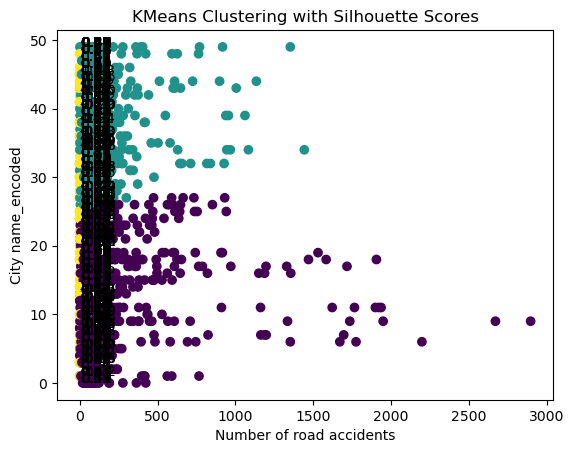

In [35]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_data, orginal_data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Optionally, you can print the Silhouette Score for each data point
silhouette_values = silhouette_samples(scaled_data, orginal_data['cluster'])
orginal_data['silhouette'] = silhouette_values

# Plotting the clusters with Silhouette Scores
plt.scatter(orginal_data['Number of road accidents'], orginal_data['City name_encoded'], c=orginal_data['cluster'], cmap='viridis')
plt.title('KMeans Clustering with Silhouette Scores')
plt.xlabel('Number of road accidents')
plt.ylabel('City name_encoded')

# Draw vertical lines for silhouette scores
for i, silhouette in enumerate(silhouette_values):
    plt.text(orginal_data['Number_of_road_accidents_log'][i] + 0.1, orginal_data['City name_encoded'][i], f'{silhouette:.2f}')

plt.show()

After feature transformation also GMM didnt workes because of significant number of outliers

### K-means++ on transformed feature

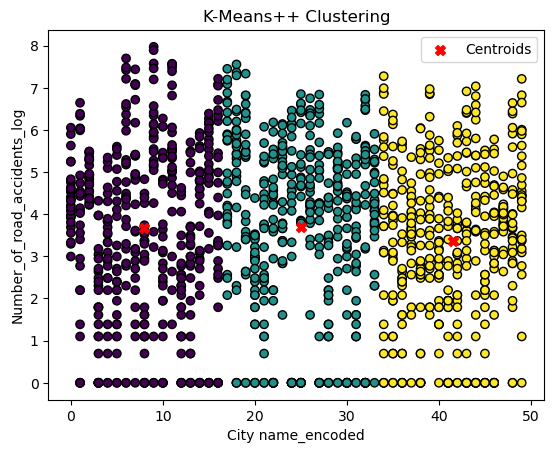

In [36]:
n_clusters = 3

features = orginal_data[['City name_encoded', 'Number_of_road_accidents_log']]
# Perform k-means clustering with KMeans++ initialization
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
orginal_data['cluster'] = kmeans.fit_predict(features)

# Visualize the clusters
plt.scatter(orginal_data['City name_encoded'], orginal_data['Number_of_road_accidents_log'], c=orginal_data['cluster'], cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=50, label='Centroids')
plt.title('K-Means++ Clustering')
plt.xlabel('City name_encoded')
plt.ylabel('Number_of_road_accidents_log')
plt.legend()
plt.show()

Silhouette Score: 0.24779897940506737


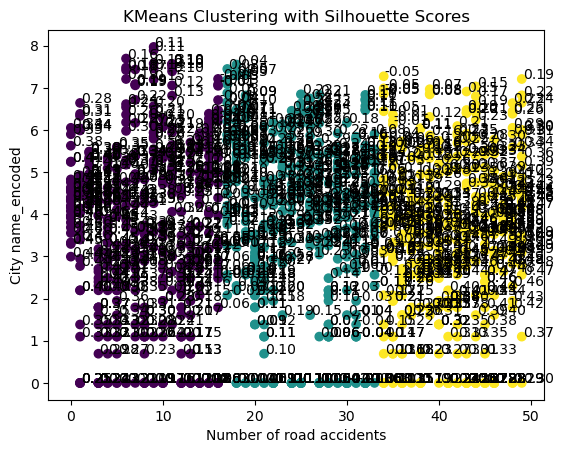

In [37]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_data, orginal_data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Optionally, you can print the Silhouette Score for each data point
silhouette_values = silhouette_samples(scaled_data, orginal_data['cluster'])
orginal_data['silhouette'] = silhouette_values

# Plotting the clusters with Silhouette Scores
plt.scatter(orginal_data['City name_encoded'], orginal_data['Number_of_road_accidents_log'], c=orginal_data['cluster'], cmap='viridis')
plt.title('KMeans Clustering with Silhouette Scores')
plt.xlabel('Number of road accidents')
plt.ylabel('City name_encoded')

# Draw vertical lines for silhouette scores
for i, silhouette in enumerate(silhouette_values):
    plt.text(orginal_data['City name_encoded'][i] + 0.1, orginal_data['Number_of_road_accidents_log'][i], f'{silhouette:.2f}')

plt.show()

### GMM on when both the features are tranformed  

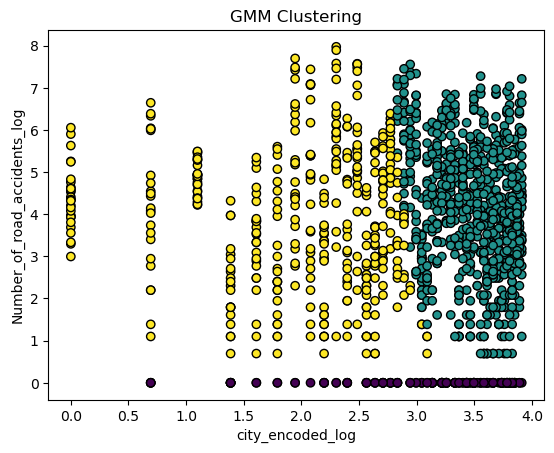

In [38]:
features = orginal_data[['city_encoded_log', 'Number_of_road_accidents_log']]
# Standardize the features (important for GMM)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform GMM clustering
gmm = GaussianMixture(n_components=3)  # Adjust the number of components as needed
orginal_data['cluster'] = gmm.fit_predict(features_scaled)

# Visualize the clusters
plt.scatter(orginal_data['city_encoded_log'], orginal_data['Number_of_road_accidents_log'], c=orginal_data['cluster'], cmap='viridis', edgecolors='k')
plt.title('GMM Clustering')
plt.xlabel('city_encoded_log')
plt.ylabel('Number_of_road_accidents_log')
plt.show()

Silhouette Score: 0.340624171849463


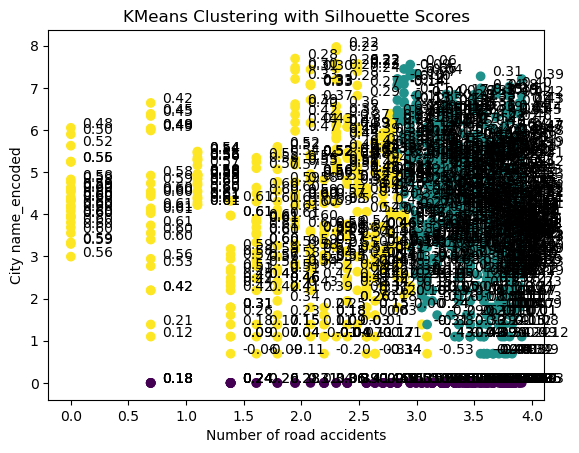

In [39]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_data, orginal_data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Optionally, you can print the Silhouette Score for each data point
silhouette_values = silhouette_samples(scaled_data, orginal_data['cluster'])
orginal_data['silhouette'] = silhouette_values

# Plotting the clusters with Silhouette Scores
plt.scatter(orginal_data['city_encoded_log'], orginal_data['Number_of_road_accidents_log'], c=orginal_data['cluster'], cmap='viridis')
plt.title('KMeans Clustering with Silhouette Scores')
plt.xlabel('Number of road accidents')
plt.ylabel('City name_encoded')

# Draw vertical lines for silhouette scores
for i, silhouette in enumerate(silhouette_values):
    plt.text(orginal_data['city_encoded_log'][i] + 0.1, orginal_data['Number_of_road_accidents_log'][i], f'{silhouette:.2f}')

plt.show()

## plotting in 3-d with 3 features 

###  K-means 

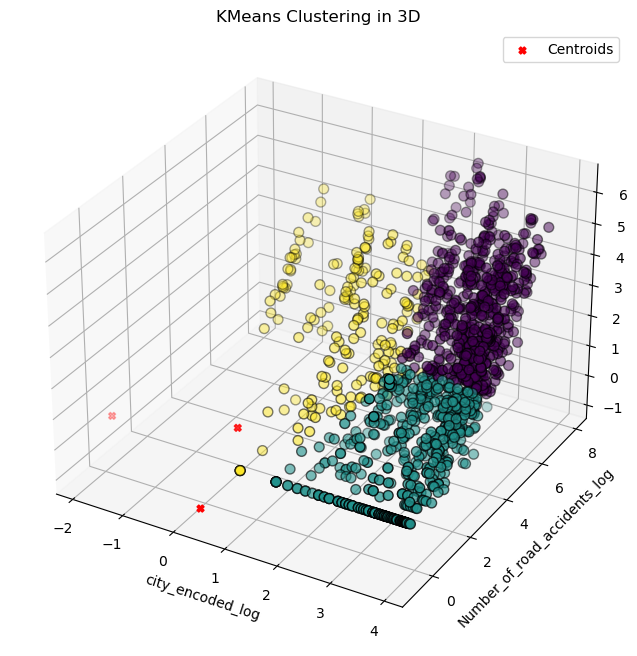

In [40]:
features = ['city_encoded_log', 'Number_of_road_accidents_log', 'killed_log']

data = data_cl[features]

# Standardize the features (important for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_cl['cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the clusters in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_cl['city_encoded_log'], data_cl['Number_of_road_accidents_log'], data_cl['killed_log'], c=data_cl['cluster'], cmap='viridis', edgecolors='k', s=50)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='X', s=25, label='Centroids')
ax.set_title('KMeans Clustering in 3D')
ax.set_xlabel('city_encoded_log')
ax.set_ylabel('Number_of_road_accidents_log')
ax.set_zlabel('killed_log')
ax.legend()

plt.show()

Silhouette Score: 0.40048605600331405


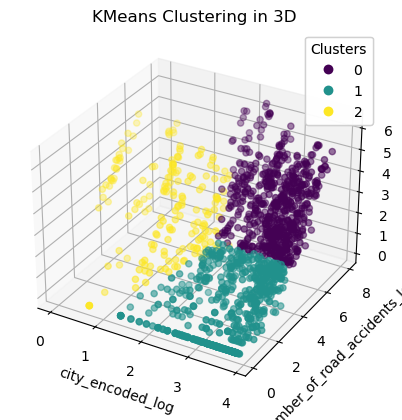

In [41]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(data_scaled, data_cl['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Plotting the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data_cl['city_encoded_log'], data_cl['Number_of_road_accidents_log'], data_cl['killed_log'], c=data_cl['cluster'], cmap='viridis')
ax.set_xlabel('city_encoded_log')
ax.set_ylabel('Number_of_road_accidents_log')
ax.set_zlabel('killed_log')

# Add legend
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

plt.title('KMeans Clustering in 3D')
plt.show()

Here dark puple cluster tell the cluster of cities where number of people killed are high 

### GMM

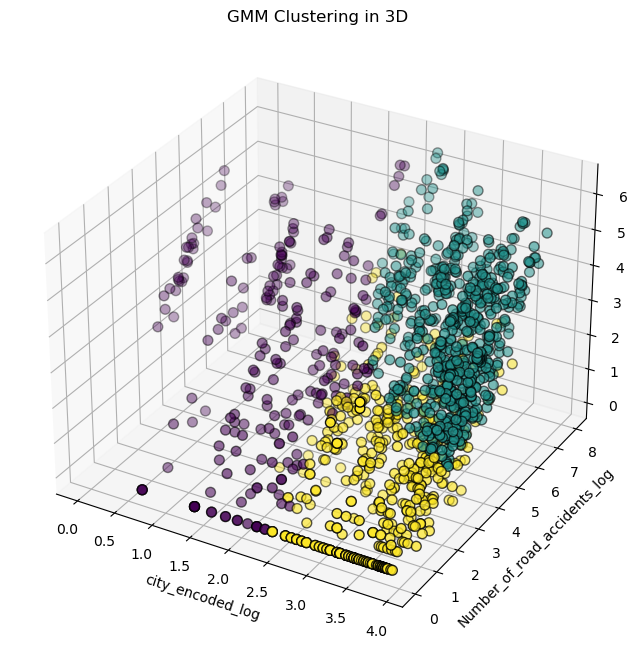

In [42]:
features = ['city_encoded_log', 'Number_of_road_accidents_log', 'killed_log']
data = data_cl[features]
# Standardize the features (important for GMM)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust the number of components as needed
data_cl['cluster'] = gmm.fit_predict(data_scaled)

# Visualize the clusters in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_cl['city_encoded_log'], data_cl['Number_of_road_accidents_log'], data_cl['killed_log'], c=data_cl['cluster'], cmap='viridis', edgecolors='k', s=50)

ax.set_title('GMM Clustering in 3D')
ax.set_xlabel('city_encoded_log')
ax.set_ylabel('Number_of_road_accidents_log')
ax.set_zlabel('killed_log')
plt.show()

Here green cluster tell the cluster of cities where number of people killed are high 

Silhouette Score: 0.3227759675660211


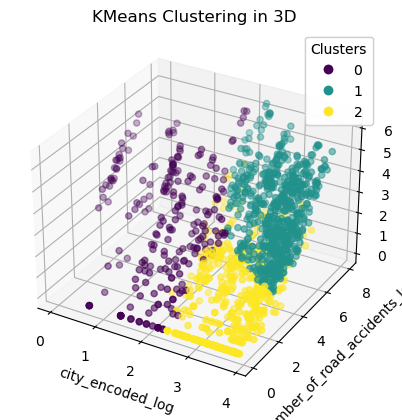

In [43]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(data_scaled, data_cl['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Plotting the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data_cl['city_encoded_log'], data_cl['Number_of_road_accidents_log'], data_cl['killed_log'], c=data_cl['cluster'], cmap='viridis')
ax.set_xlabel('city_encoded_log')
ax.set_ylabel('Number_of_road_accidents_log')
ax.set_zlabel('killed_log')

# Add legend
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

plt.title('KMeans Clustering in 3D')
plt.show()

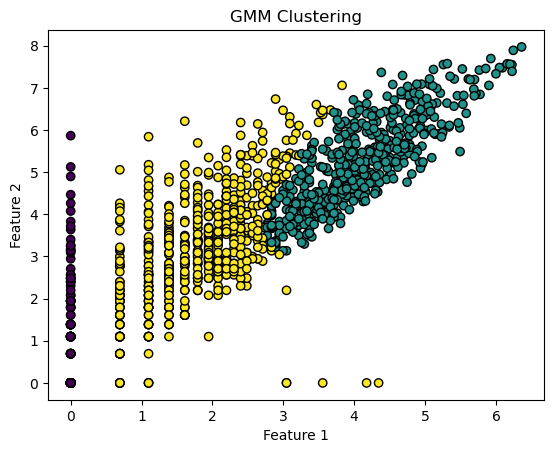

In [44]:
from sklearn.mixture import GaussianMixture

features = data_cl[['killed_log', 'Number_of_road_accidents_log']]
# Standardize the features (important for GMM)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform GMM clustering
gmm = GaussianMixture(n_components=3)  # Adjust the number of components as needed
data_cl['cluster'] = gmm.fit_predict(features_scaled)

# Visualize the clusters
plt.scatter(data_cl['killed_log'], data_cl['Number_of_road_accidents_log'], c=data_cl['cluster'], cmap='viridis', edgecolors='k')
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Silhouette Score: 0.41841609795846674


Text(0, 0.5, 'City name_encoded')

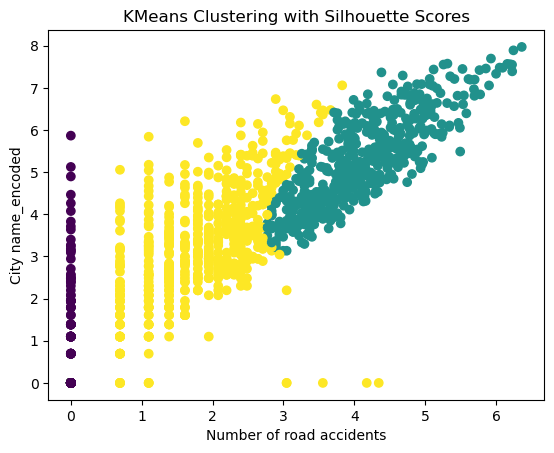

In [45]:
silhouette_avg = silhouette_score(features_scaled, data_cl['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Optionally, you can print the Silhouette Score for each data point
silhouette_values = silhouette_samples(features_scaled, data_cl['cluster'])
data_cl['silhouette'] = silhouette_values

# Plotting the clusters with Silhouette Scores
plt.scatter(data_cl['killed_log'], data_cl['Number_of_road_accidents_log'], c=data_cl['cluster'], cmap='viridis')
plt.title('KMeans Clustering with Silhouette Scores')
plt.xlabel('Number of road accidents')
plt.ylabel('City name_encoded')



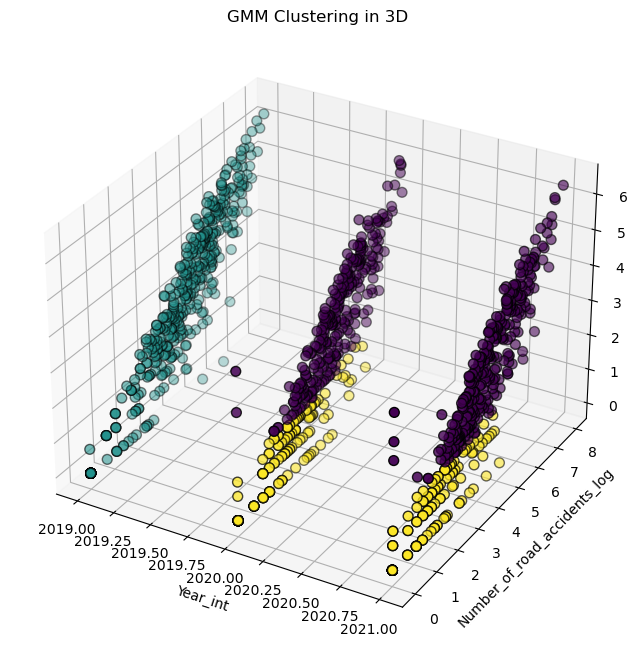

In [46]:
features = ['Year_int', 'Number_of_road_accidents_log', 'killed_log']
data = data_cl[features]
# Standardize the features (important for GMM)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust the number of components as needed
data_cl['cluster'] = gmm.fit_predict(data_scaled)

# Visualize the clusters in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_cl['Year_int'], data_cl['Number_of_road_accidents_log'], data_cl['killed_log'], c=data_cl['cluster'], cmap='viridis', edgecolors='k', s=50)

ax.set_title('GMM Clustering in 3D')
ax.set_xlabel('Year_int')
ax.set_ylabel('Number_of_road_accidents_log')
ax.set_zlabel('killed_log')

plt.show()

Silhouette Score: 0.30789586743692365


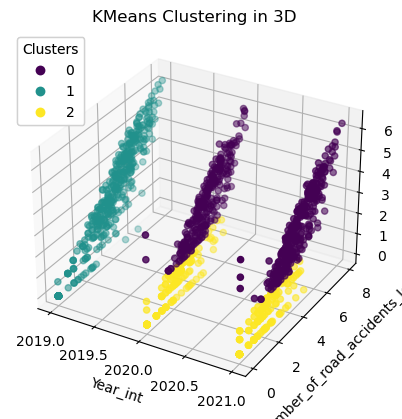

In [47]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(data_scaled, data_cl['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Plotting the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data_cl['Year_int'], data_cl['Number_of_road_accidents_log'], data_cl['killed_log'], c=data_cl['cluster'], cmap='viridis')
ax.set_xlabel('Year_int')
ax.set_ylabel('Number_of_road_accidents_log')
ax.set_zlabel('killed_log')

# Add legend
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

plt.title('KMeans Clustering in 3D')
plt.show()